In [1]:
#與雲端硬碟做連結
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#引入所需函式庫
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
import cv2
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd


In [3]:
#解壓縮檔案到雲端
!unzip '/content/drive/MyDrive/all_data 2.zip' -d '/content/'

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/all_data/福山萵苣/49606.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._49606.jpg  
  inflating: /content/all_data/福山萵苣/49612.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._49612.jpg  
  inflating: /content/all_data/福山萵苣/49809.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._49809.jpg  
  inflating: /content/all_data/福山萵苣/49821.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._49821.jpg  
  inflating: /content/all_data/福山萵苣/49835.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._49835.jpg  
  inflating: /content/all_data/福山萵苣/30110.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._30110.jpg  
  inflating: /content/all_data/福山萵苣/30138.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._30138.jpg  
  inflating: /content/all_data/福山萵苣/30139.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._30139.jpg  
  inflating: /content/all_data/福山萵苣/30111.jpg  
  inflating: /content/__MACOSX/all_data/福山萵苣/._30111.jpg  
  inflating: /co

In [4]:
!pip install split-folders

In [5]:
import splitfolders

# 資料來源資料夾
input_folder = '/content/all_data'

# 分割後的輸出資料夾
output_folder = '/content/output'

# 按 8:2 的比例分割
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(0.8, 0.2))


Copying files: 22850 files [00:10, 2211.70 files/s]


In [6]:
name=['三杯雞','什錦炒麵','咖哩雞','塔香海茸','大陸妹','客家小炒','小番茄','小松菜','青松菜','木瓜','柳丁','棗子','橘子','沙茶肉片','油菜','洋蔥炒蛋','滷蛋','滷雞腿','玉米炒蛋','瓜仔肉','番茄炒蛋','白飯','白菜滷','萵苣','空心菜','糖醋雞丁','紅蘿蔔炒蛋','義大利麵','芥藍','菠菜','葡萄','蒜泥白肉','蒸蛋','蓮霧','螞蟻上樹','西瓜','豆芽','關東煮','青江菜','香蕉','魚排','馬鈴薯燉肉','高麗菜','鳳梨','鵝白菜','鹽酥雞','雞塊','麻婆豆腐','麻油雞','黑胡椒豬柳']
print(len(name))

50


In [7]:
#安裝字體檔
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-12-07 08:58:31--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.113, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-12-07 08:58:31--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  74.6MB/s    in 0.3s    

2024-12-07 08:58:37

Found 22835 images belonging to 50 classes.


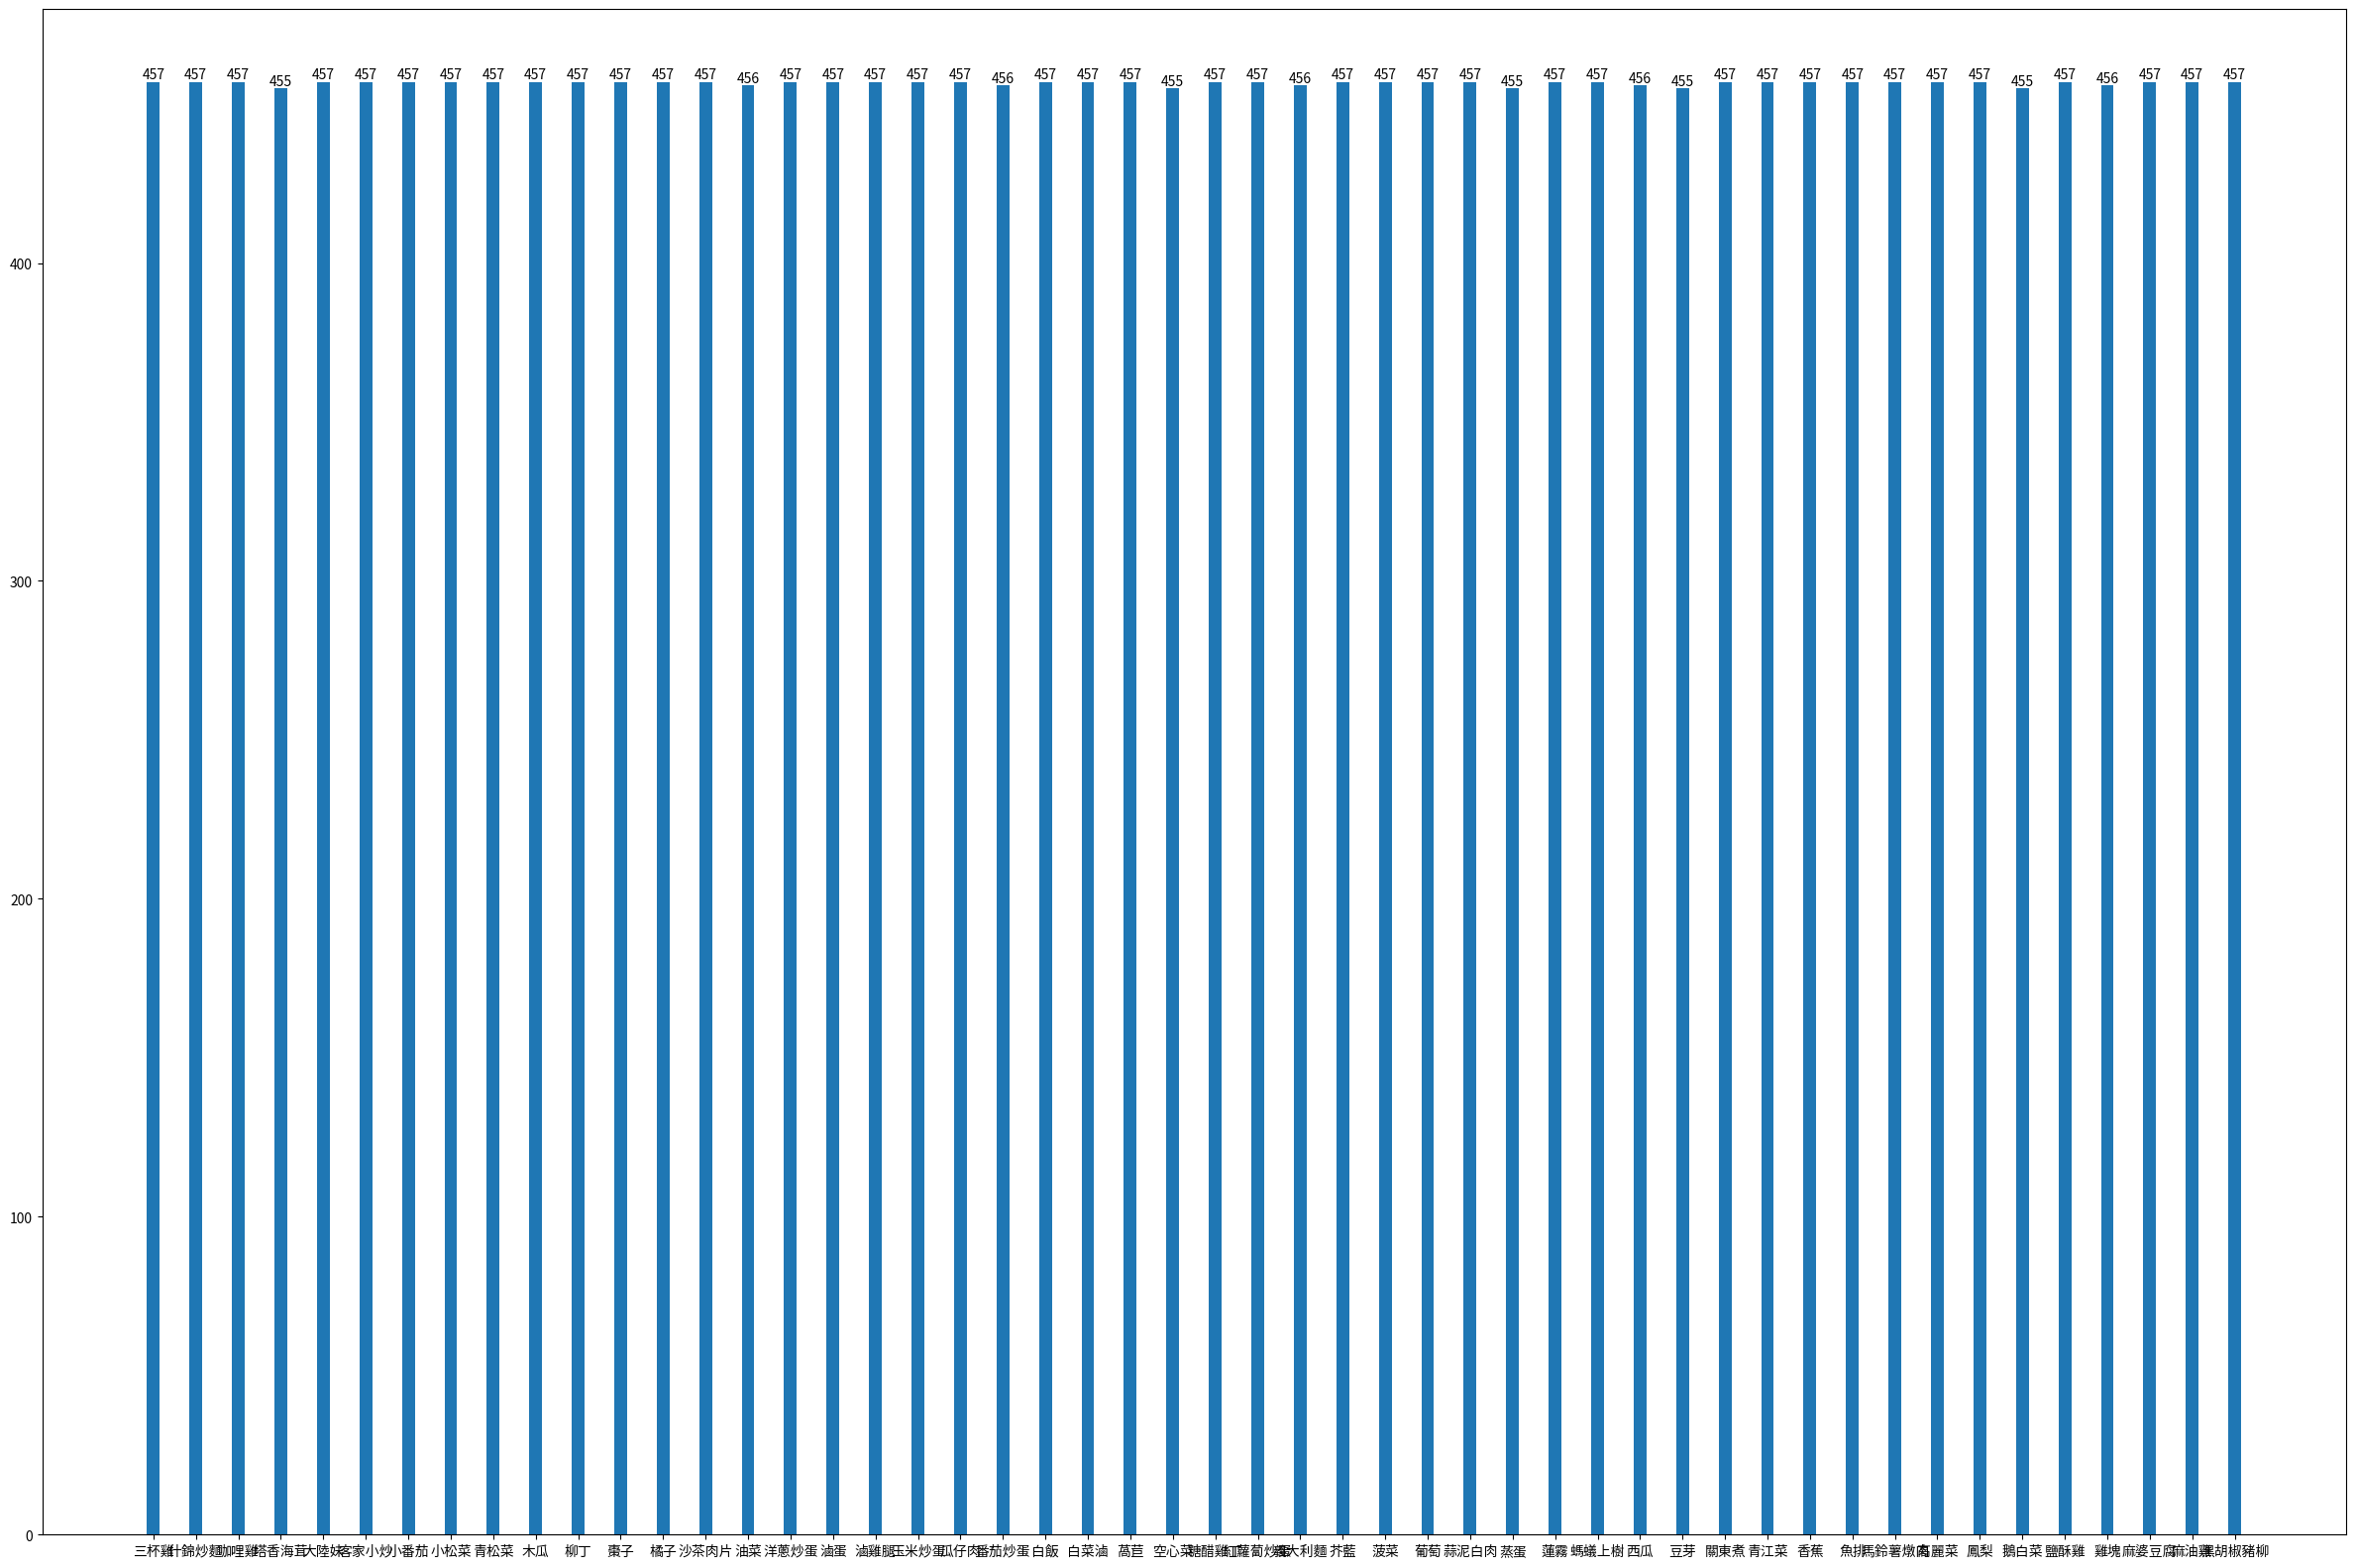

In [8]:
#畫出各種類的圖片數
data = ImageDataGenerator()
train = data.flow_from_directory(
    directory='/content/all_data',
    target_size=(180,180),
    batch_size=100,
    class_mode="categorical",
    shuffle=True,
)
label_count = []
for i in range(len(name)):
    label_count.append(np.count_nonzero(train.labels == i))

plt.figure(figsize = (30, 20))
p1 = plt.bar(name, label_count, width= 0.3)
plt.bar_label(p1, label_type='edge')
plt.show()

In [ ]:
import splitfolders

# 資料來源資料夾
input_folder = '/content/output/train'

# 新的輸出資料夾
output_folder = '/content/output_split'

# 按 90:10 比例分割 train 成新的 train 和 val
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(0.9, 0.1))


Copying files: 18250 files [00:04, 4151.75 files/s]


In [10]:
#用ImageDataGenerator讀入圖片

batch_size = 100
img_size = (180, 180)
img_shape = (180, 180, 3)

datagen = ImageDataGenerator()
augment = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

train_generator = augment.flow_from_directory(
    directory='/content/output_split/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
)
validation_generator = datagen.flow_from_directory(
    directory='/content/output_split/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,
)
test_generator = datagen.flow_from_directory(
    directory='/content/output/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 16389 images belonging to 50 classes.
Found 1848 images belonging to 50 classes.
Found 4598 images belonging to 50 classes.


In [11]:
#引入pre-train model並外接CNN
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras import applications

effnet_base = keras.applications.EfficientNetV2L(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3)
)

model = models.Sequential()
model.add(effnet_base)

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='softmax'))


model.summary()

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-l (Functional)        │ (None, 6, 6, 1280)          │     117,746,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 6, 6, 128)           │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │          12,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,595,346 (456.22 MB)

 Trainable params: 119,082,770 (454.26 MB)

 Non-trainable params: 512,576 (1.96 MB)

In [12]:
effnet_base.summary()

Model: "efficientnetv2-l"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 180, 180, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 90, 90, 32)     │            864 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 90, 90, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 90, 90, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 90, 90, 32)     │          9,216 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 90, 90, 32)     │            128 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 90, 90, 32)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 90, 90, 32)     │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 90, 90, 32)     │          9,216 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 90, 90, 32)     │            128 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 90, 90, 32)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 90, 90, 32)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 90, 90, 32)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1c_project_conv 

 Total params: 117,746,848 (449.17 MB)

 Trainable params: 117,234,272 (447.21 MB)

 Non-trainable params: 512,576 (1.96 MB)

In [13]:
#將pre-train model最後180層的參數設定為可訓練
effnet_base.trainable = True

trainable_layer = 180
for layer in effnet_base.layers[:-trainable_layer]:
    layer.trainable = False

In [14]:
n=0
for layer in effnet_base.layers:
  n+=1
print(n)

1028


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-l (Functional)        │ (None, 6, 6, 1280)          │     117,746,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 6, 6, 128)           │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │          12,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,595,346 (456.22 MB)

 Trainable params: 53,040,818 (202.33 MB)

 Non-trainable params: 66,554,528 (253.89 MB)

In [16]:
#編譯模型
model.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])

In [17]:
#設定callback，讓模型訓練時能夠自動降低learning rate
call=[
    tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=3,
            verbose=1,
            mode='auto'),
]

In [18]:
#訓練模型
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=call,
    )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.0538 - loss: 3.8733 - top_5_categorical_accuracy: 0.1972 - val_accuracy: 0.3534 - val_loss: 2.1569 - val_top_5_categorical_accuracy: 0.7965 - learning_rate: 0.0010
Epoch 2/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.3025 - loss: 2.3192 - top_5_categorical_accuracy: 0.6953 - val_accuracy: 0.5417 - val_loss: 1.4438 - val_top_5_categorical_accuracy: 0.9215 - learning_rate: 0.0010
Epoch 3/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.4650 - loss: 1.6662 - top_5_categorical_accuracy: 0.8575 - val_accuracy: 0.6299 - val_loss: 1.2088 - val_top_5_categorical_accuracy: 0.9383 - learning_rate: 0.0010
Epoch 4/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.5521 - loss: 1.3934 - top_5_categorical_accuracy: 0.8939 - val_accuracy: 0.6575 - val_loss: 1.0306 - val_top_5_categorical_accuracy: 0.9459 - learning_rate: 0.0010
Epoch 5/30
164/164 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.6092 - loss: 1.1790 

In [19]:
#fine tunning
effnet_base.trainable = False
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5,name='top_5_categorical_accuracy',dtype=None)])
epochs=10
history1 = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=call,
    )

Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.8757 - loss: 0.3534 - top_5_categorical_accuracy: 0.9925 - val_accuracy: 0.8014 - val_loss: 0.7028 - val_top_5_categorical_accuracy: 0.9713 - learning_rate: 1.0000e-04
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8727 - loss: 0.3538 - top_5_categorical_accuracy: 0.9931 - val_accuracy: 0.7992 - val_loss: 0.7101 - val_top_5_categorical_accuracy: 0.9692 - learning_rate: 1.0000e-04
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.8810 - loss: 0.3427 - top_5_categorical_accuracy: 0.9928 - val_accuracy: 0.8009 - val_loss: 0.7076 - val_top_5_categorical_accuracy: 0.9702 - learning_rate: 1.0000e-04
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8824 - loss: 0.3610 - top_5_categorical_accuracy: 0.9929
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
164/164 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8824 - loss: 0.3609 - top_5_categorical_a

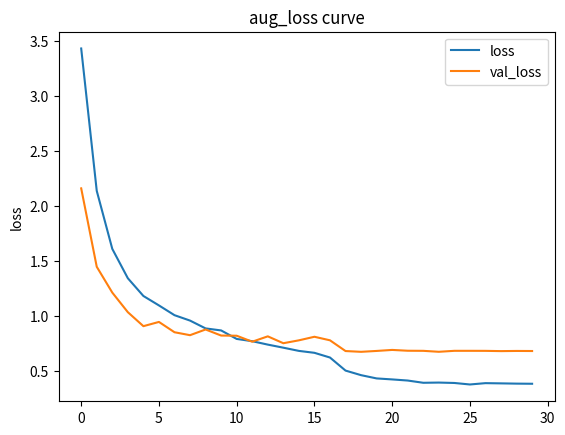

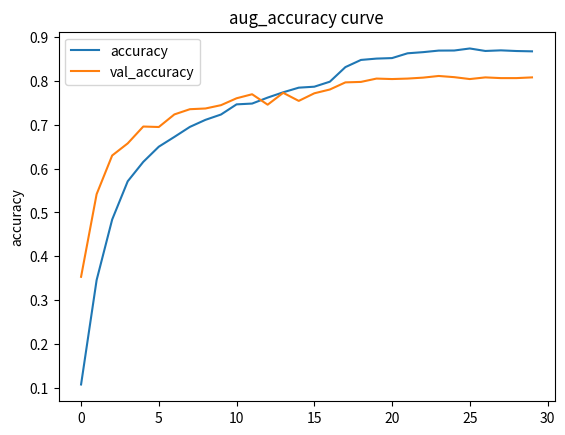

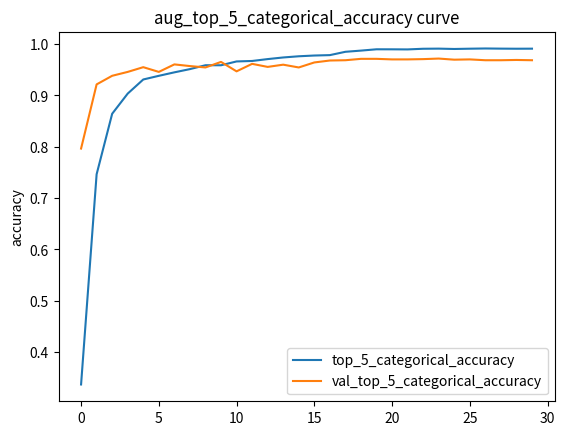

In [20]:
#畫出loss_curve、accuracy_curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title('aug_loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('aug_accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history.history['top_5_categorical_accuracy'],label='top_5_categorical_accuracy')
plt.plot(history.history['val_top_5_categorical_accuracy'],label='val_top_5_categorical_accuracy')
plt.title('aug_top_5_categorical_accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

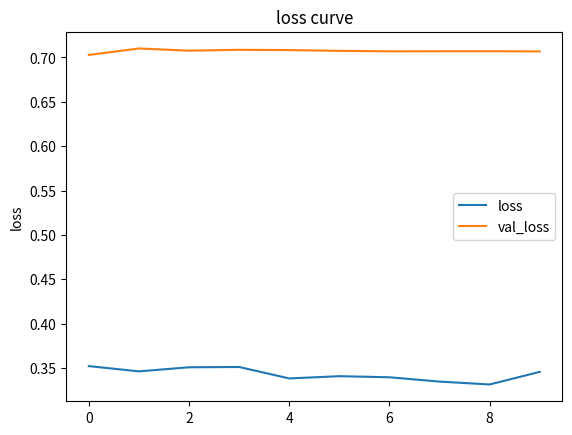

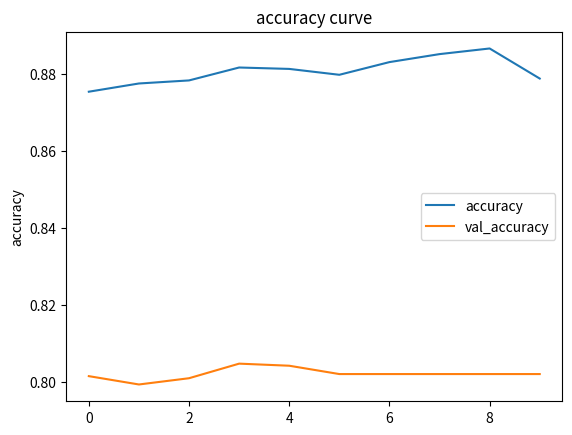

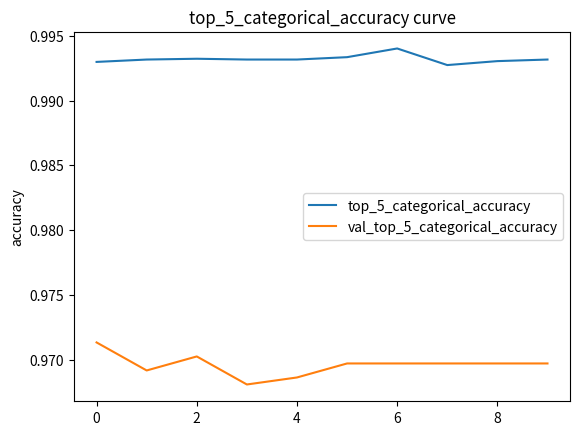

In [21]:
#畫出loss_curve、accuracy_curve(fine tunning)
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.title('loss curve')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(history1.history['accuracy'],label='accuracy')
plt.plot(history1.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history1.history['top_5_categorical_accuracy'],label='top_5_categorical_accuracy')
plt.plot(history1.history['val_top_5_categorical_accuracy'],label='val_top_5_categorical_accuracy')
plt.title('top_5_categorical_accuracy curve')
plt.ylabel('accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step


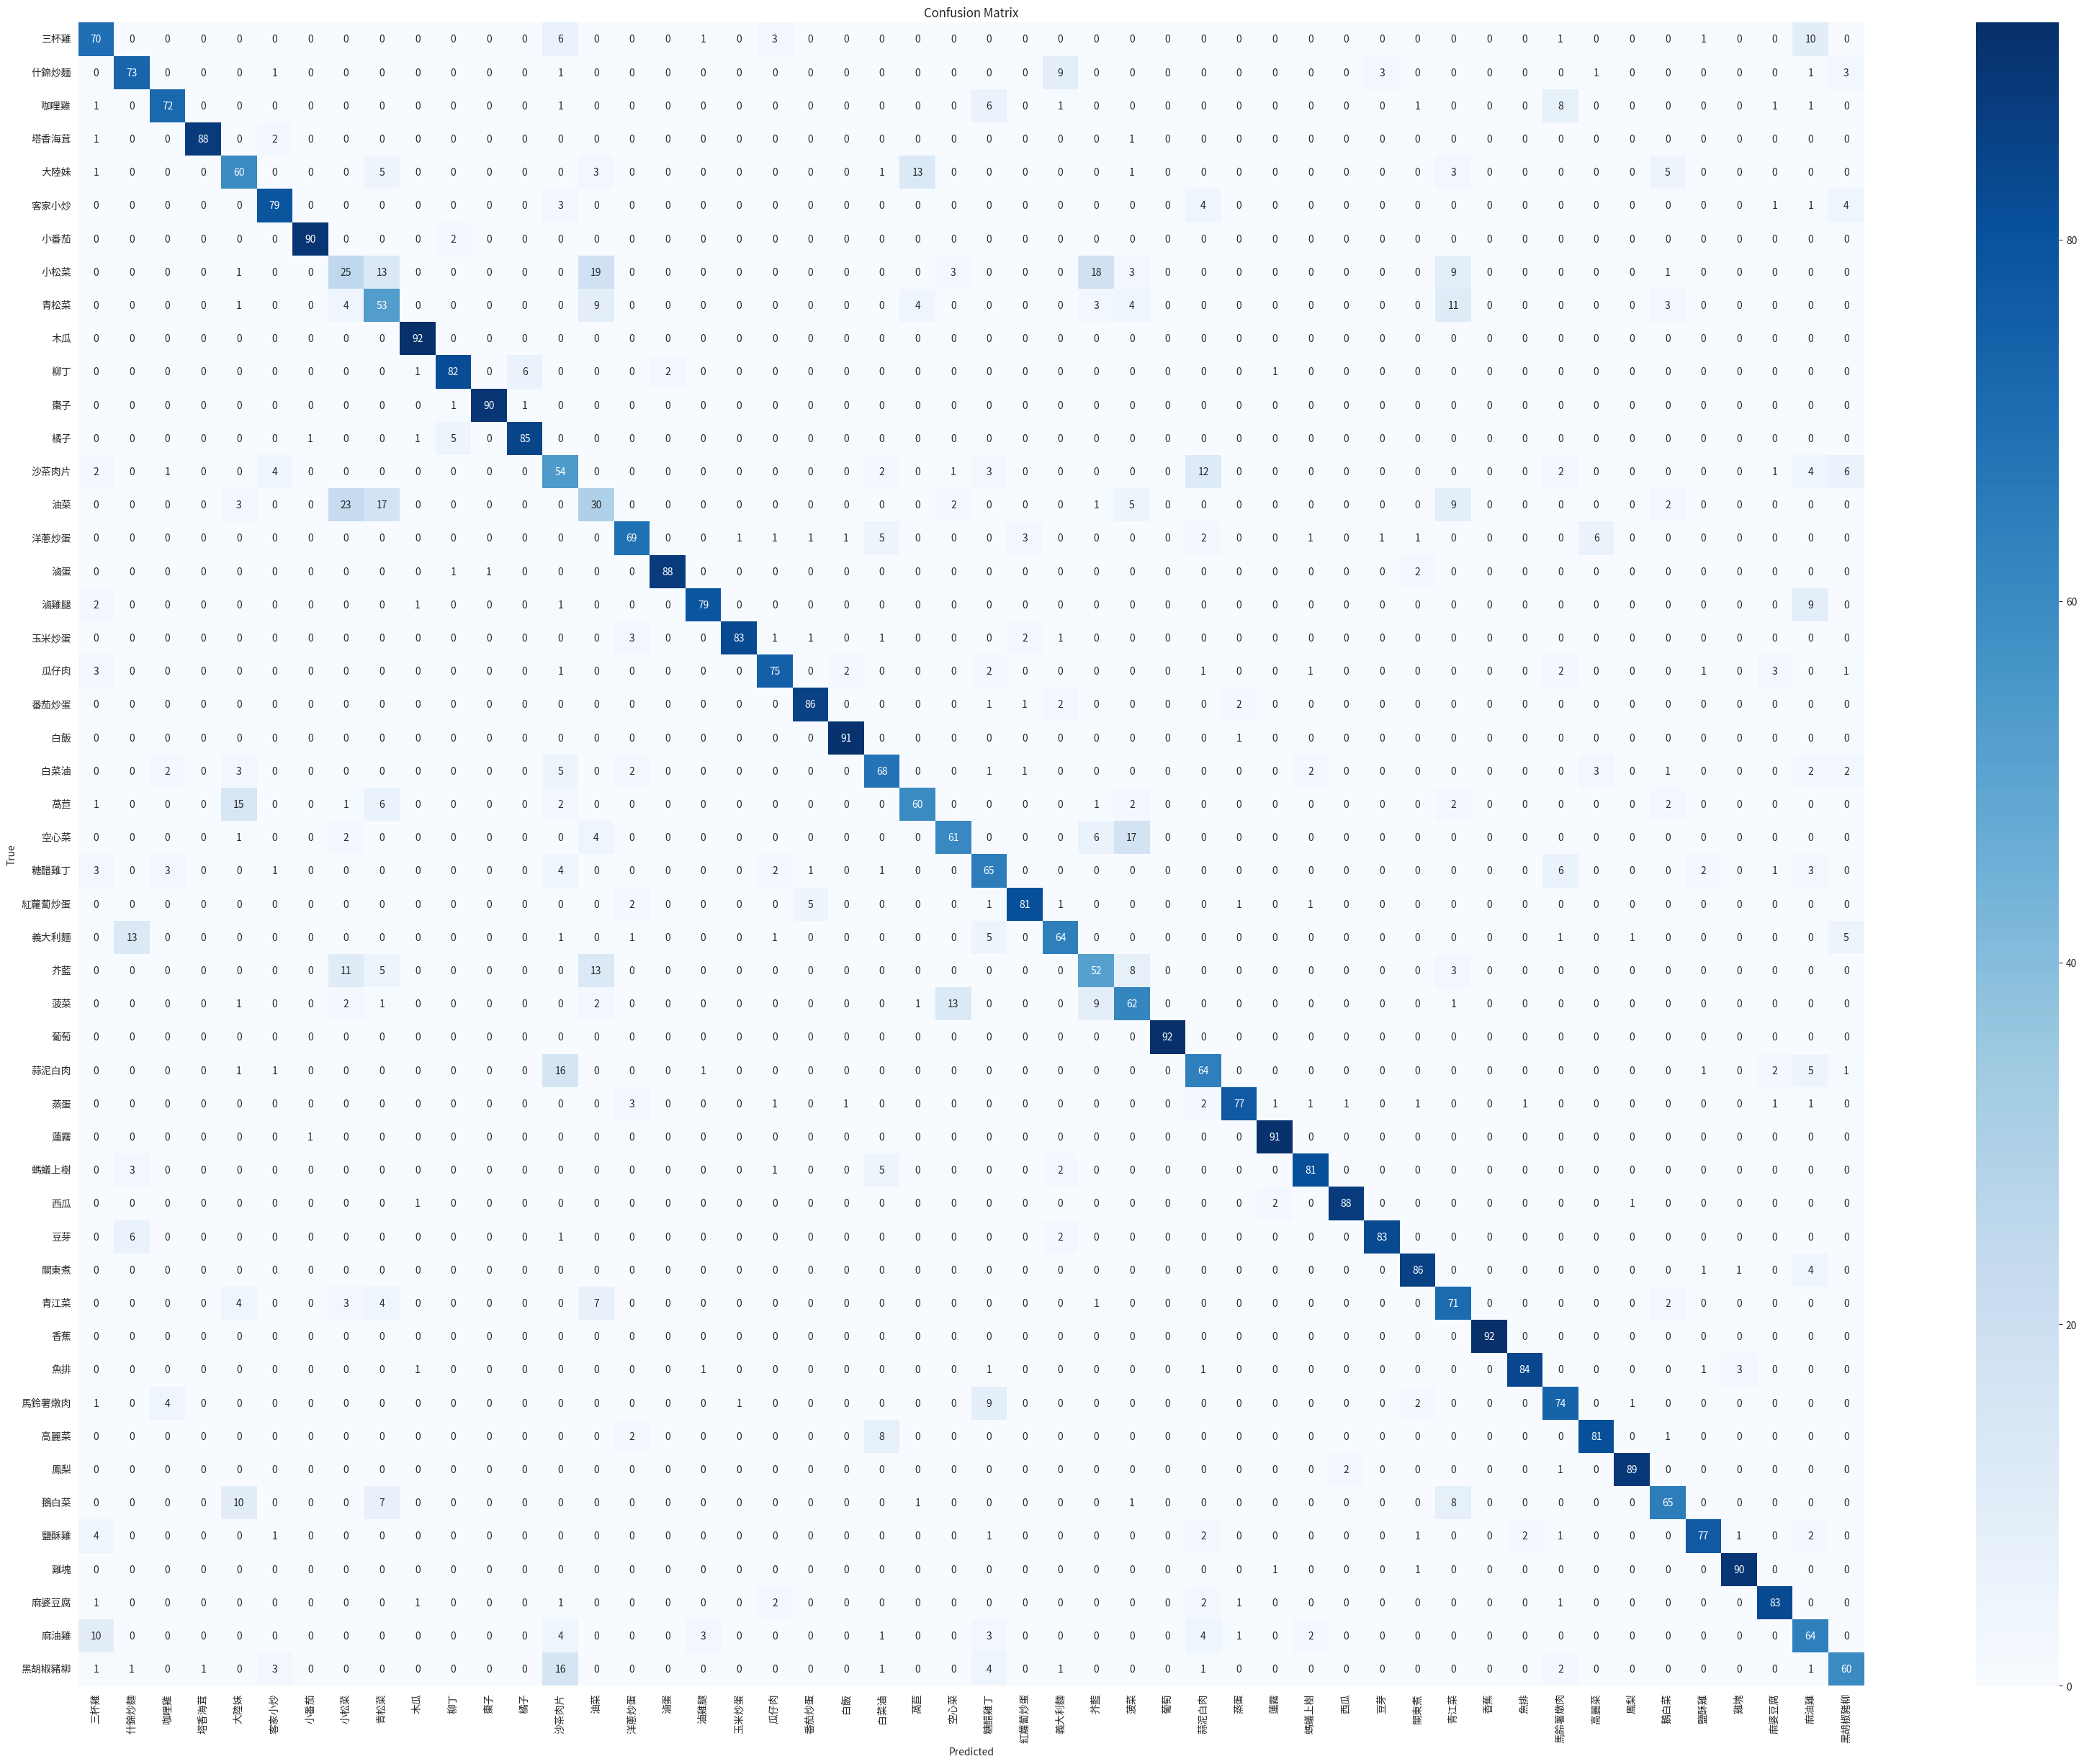

              precision    recall  f1-score   support

         三杯雞       0.69      0.76      0.73        92
        什錦炒麵       0.76      0.79      0.78        92
         咖哩雞       0.88      0.78      0.83        92
        塔香海茸       0.99      0.96      0.97        92
         大陸妹       0.60      0.65      0.62        92
        客家小炒       0.86      0.86      0.86        92
         小番茄       0.98      0.98      0.98        92
         小松菜       0.35      0.27      0.31        92
         青松菜       0.48      0.58      0.52        92
          木瓜       0.94      1.00      0.97        92
          柳丁       0.90      0.89      0.90        92
          棗子       0.99      0.98      0.98        92
          橘子       0.92      0.92      0.92        92
        沙茶肉片       0.46      0.59      0.52        92
          油菜       0.34      0.33      0.34        92
        洋蔥炒蛋       0.84      0.75      0.79        92
          滷蛋       0.98      0.96      0.97        92
         滷雞腿       0.93    

In [22]:
#畫出confusion_matrix、Classification_report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.utils import to_categorical


# 預測測試集
test_predictions = model.predict(test_generator)
# 將預測轉換為類別標籤
predicted_labels = np.argmax(test_predictions, axis=1)

# 繪製混淆矩陣
cm = confusion_matrix(test_generator.labels, predicted_labels)

# 使用Seaborn繪製混淆矩陣的熱圖
plt.figure(figsize=(40, 30))
sns.set_style("whitegrid",{"font.sans-serif":['Taipei Sans TC Beta']})
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=name, yticklabels=name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 打印分類報告
print(classification_report(test_generator.labels, predicted_labels, target_names=name))

In [23]:
print(classification_report(test_generator.labels, predicted_labels, target_names=name))

              precision    recall  f1-score   support

         三杯雞       0.69      0.76      0.73        92
        什錦炒麵       0.76      0.79      0.78        92
         咖哩雞       0.88      0.78      0.83        92
        塔香海茸       0.99      0.96      0.97        92
         大陸妹       0.60      0.65      0.62        92
        客家小炒       0.86      0.86      0.86        92
         小番茄       0.98      0.98      0.98        92
         小松菜       0.35      0.27      0.31        92
         青松菜       0.48      0.58      0.52        92
          木瓜       0.94      1.00      0.97        92
          柳丁       0.90      0.89      0.90        92
          棗子       0.99      0.98      0.98        92
          橘子       0.92      0.92      0.92        92
        沙茶肉片       0.46      0.59      0.52        92
          油菜       0.34      0.33      0.34        92
        洋蔥炒蛋       0.84      0.75      0.79        92
          滷蛋       0.98      0.96      0.97        92
         滷雞腿       0.93    